In [10]:
import pandas as pd
import numpy as np
from factor_analyzer.utils import covariance_to_correlation
import graphviz
import semopy
import matplotlib.pyplot as plt
import seaborn as sns



In [11]:
df_all = pd.read_csv('all.csv')

In [12]:
df_all[['x', 'd1', 'd2', 'd3', 'd4', 'd5', 'w1', 'w2', 'w3', 'w4','w5', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'p']]


,x,d1,d2,d3,d4,d5,w1,w2,w3,w4,w5,c1,c2,c3,c4,c5,c6,p
0,1,6.2937,1.9398,6.7618,3.07992,5.72156,36.96507,25.87807,21.29791,21.00362,14.88221,20,30,29,21,10,6,3
1,2,11.0338,6.1047,7.2883,7.54295,9.90751,25.40064,16.89495,16.52988,16.46094,11.70966,20,21,14,8,12,21,3
2,3,7.1932,2.1034,4.9684,5.66562,8.38533,29.94836,20.88529,19.59672,20.50303,14.87523,21,19,18,16,18,15,4
3,4,7.8981,-0.9757,4.2858,3.84009,4.87743,26.87720,18.93591,16.00807,17.58007,11.67031,21,31,28,16,17,11,4
4,5,9.7256,0.0349,7.1680,3.90703,6.30194,43.20713,28.51156,24.68393,25.27235,19.50599,28,27,23,24,24,23,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,800,7.5822,0.1201,6.5722,3.32963,4.75933,22.04394,17.21857,11.89841,14.83118,10.16673,22,27,33,19,18,11,4
800,801,5.6149,-0.7314,1.6795,3.74132,5.60217,29.58012,15.73032,14.89273,16.04473,10.39065,18,20,33,18,24,10,4
801,802,6.0455,2.0958,3.8635,4.97563,5.69270,28.18144,19.74430,19.20815,16.45026,12.30557,21,30,14,16,11,21,2
802,803,8.6738,-0.4216,1.4291,4.27503,5.49286,31.06191,21.50243,19.40287,18.43385,14.97270,15,24,28,26,17,6,4


In [13]:
df_all_t = pd.read_csv('主観評価設問状態_origin_mean_drop0808.csv')

new_column_names = {'0': 'none_s','1': 'image_s', '2': 'announce_s','3': 'image_sound_s', '4': 'image_announce_s'}

df_all_t = df_all_t.rename(columns=new_column_names)
df_all_t[6:13]

,Unnamed: 0,none_s,image_s,announce_s,image_sound_s,image_announce_s
6,6,3.00,3.00,3.0,3.00,3.00
7,7,3.20,3.05,3.2,3.05,3.15
8,8,2.75,3.00,2.9,3.00,3.40
9,9,3.00,2.70,3.1,2.60,3.20
10,10,2.00,4.60,4.5,4.05,4.35
11,11,2.60,3.50,3.9,3.05,3.80
12,12,2.40,3.50,3.4,3.50,3.35


In [14]:
df_all = pd.concat([df_all[['x', 'd1', 'd2', 'd3', 'd4', 'd5', 'w1', 'w2', 'w3', 'w4','w5', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'p']], df_all_t[['none_s', 'image_s',
       'announce_s', 'image_sound_s', 'image_announce_s']]], axis=1)

In [15]:
df_all.columns

Index(['x', 'd1', 'd2', 'd3', 'd4', 'd5', 'w1', 'w2', 'w3', 'w4', 'w5', 'c1',
       'c2', 'c3', 'c4', 'c5', 'c6', 'p', 'none_s', 'image_s', 'announce_s',
       'image_sound_s', 'image_announce_s'],
      dtype='object')

In [16]:
#カラム名が'none_s', 'image_s','announce_s', 'image_sound_s', 'image_announce_s'のものを抽出
df_all_s = df_all[['none_s', 'image_s','announce_s', 'image_sound_s', 'image_announce_s']]
df_all_s

,none_s,image_s,announce_s,image_sound_s,image_announce_s
0,1.75,3.10,3.55,3.60,3.55
1,3.00,3.00,3.00,3.00,3.00
2,2.40,2.40,2.70,2.60,3.50
3,2.15,3.40,3.85,3.30,3.55
4,1.80,4.05,4.20,3.80,4.70
...,...,...,...,...,...
799,2.10,4.15,4.35,4.35,4.35
800,2.40,4.05,4.05,3.70,3.75
801,3.40,3.45,3.60,3.60,3.60
802,2.20,4.25,4.20,3.90,4.30


In [17]:
# 各行の最大値を求める
df_all_s['max_value'] = df_all_s.max(axis=1)
# 各行で最大値の数をカウントする
df_all_s['max_count'] = df_all_s.apply(lambda row: list(row).count(row['max_value']) - 1, axis=1)
df_all_s

/var/folders/5r/3m3ng3v11j57dkl0psc9lphh0000gn/T/ipykernel_13344/637014173.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_s['max_value'] = df_all_s.max(axis=1)
/var/folders/5r/3m3ng3v11j57dkl0psc9lphh0000gn/T/ipykernel_13344/637014173.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_s['max_count'] = df_all_s.apply(lambda row: list(row).count(row['max_value']) - 1, axis=1)


,none_s,image_s,announce_s,image_sound_s,image_announce_s,max_value,max_count
0,1.75,3.10,3.55,3.60,3.55,3.60,1
1,3.00,3.00,3.00,3.00,3.00,3.00,5
2,2.40,2.40,2.70,2.60,3.50,3.50,1
3,2.15,3.40,3.85,3.30,3.55,3.85,1
4,1.80,4.05,4.20,3.80,4.70,4.70,1
...,...,...,...,...,...,...,...
799,2.10,4.15,4.35,4.35,4.35,4.35,3
800,2.40,4.05,4.05,3.70,3.75,4.05,2
801,3.40,3.45,3.60,3.60,3.60,3.60,3
802,2.20,4.25,4.20,3.90,4.30,4.30,1


In [18]:
# # 各行の最大値を求める
# df_all_s['max_value'] = df_all_s.max(axis=1)

# # 各行で最大値の数をカウントする
# df_all_s['max_count'] = df_all_s.apply(lambda row: list(row).count(row['max_value']), axis=1)

# 同点がない行のみを抽出する
df_all_s_drop = df_all_s[df_all_s['max_count'] == 1]
df_all_s_drop.head(30
                   )

,none_s,image_s,announce_s,image_sound_s,image_announce_s,max_value,max_count
0,1.75,3.10,3.55,3.60,3.55,3.60,1
2,2.40,2.40,2.70,2.60,3.50,3.50,1
3,2.15,3.40,3.85,3.30,3.55,3.85,1
4,1.80,4.05,4.20,3.80,4.70,4.70,1
5,2.50,3.45,3.20,2.65,3.70,3.70,1
8,2.75,3.00,2.90,3.00,3.40,3.40,1
9,3.00,2.70,3.10,2.60,3.20,3.20,1
10,2.00,4.60,4.50,4.05,4.35,4.60,1
11,2.60,3.50,3.90,3.05,3.80,3.90,1
13,2.70,2.95,3.00,3.00,3.20,3.20,1


In [19]:
df_all_s

,none_s,image_s,announce_s,image_sound_s,image_announce_s,max_value,max_count
0,1.75,3.10,3.55,3.60,3.55,3.60,1
1,3.00,3.00,3.00,3.00,3.00,3.00,5
2,2.40,2.40,2.70,2.60,3.50,3.50,1
3,2.15,3.40,3.85,3.30,3.55,3.85,1
4,1.80,4.05,4.20,3.80,4.70,4.70,1
...,...,...,...,...,...,...,...
799,2.10,4.15,4.35,4.35,4.35,4.35,3
800,2.40,4.05,4.05,3.70,3.75,4.05,2
801,3.40,3.45,3.60,3.60,3.60,3.60,3
802,2.20,4.25,4.20,3.90,4.30,4.30,1


In [20]:
# # 各行ごとに等しい組み合わせを探す関数
# def find_equal_combinations(row):
#     values = row.values
#     columns = row.index
#     equal_combinations = []
#     # Broadcastingを利用して比較行列を作成
#     comparison_matrix = values[:, None] == values
#     # 対角成分を無視して、Trueのインデックスを取得
#     indices = np.where(np.triu(comparison_matrix, 1))
#     for i, j in zip(*indices):
#         equal_combinations.append((columns[i], columns[j]))
#     return equal_combinations

# df = df_all_s
# # 各IDごとに等しい組み合わせを確認
# df['equal_combinations'] = df.apply(find_equal_combinations, axis=1)

# # 結果を表示
# df[['equal_combinations']]

In [21]:
# #df[['equal_combinations']]とdf_allを結合
# df_all_equal = pd.concat([df_all, df[['equal_combinations']]], axis=1)
# df_all_equal

In [22]:
# #df[['equal_combinations']]の値がある行を削除
# df_all_s_drop = df_all_s.drop(index=df[df['equal_combinations'].apply(len) > 0].index)
# df_all_s_drop = df_all_s_drop[['none_s', 'image_s','announce_s', 'image_sound_s', 'image_announce_s']]
# #df_all_s_dropの行数を確認
# print(df_all_s_drop.shape)
# df_all_s_drop

In [23]:
#df_all_s_drop
# #'none_s', 'image_s','announce_s', 'image_sound_s', 'image_announce_s'の中で値が一番大きいものを抽出
df_all_s_drop_max = df_all_s_drop.idxmax(axis=1)
# #df_all_s_drop_maxの中の値をそれぞれカウント
df_all_s_drop_max.value_counts()


image_announce_s    275
announce_s          177
image_sound_s        93
image_s              84
none_s               11
Name: count, dtype: int64

<Axes: >

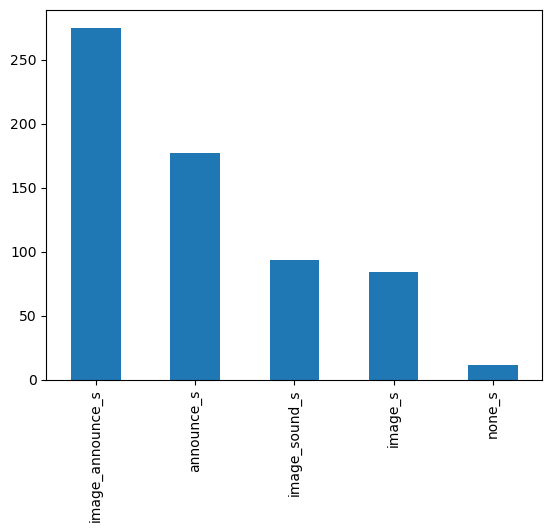

In [24]:
#'none_s', 'image_s','announce_s', 'image_sound_s', 'image_announce_s'の分布をグラフ表示（棒グラフ）縦軸がカウント数
df_all_s_drop_max.value_counts().plot(kind='bar')

In [25]:
#df_all_equal
#df[['equal_combinations']]の値がある行を削除
df_all_drop = df_all.drop(index=df_all[df_all_s['max_count'] != 1].index)
df_all_drop = df_all_drop[['d1', 'd2', 'd3', 'd4', 'd5', 'w1', 'w2', 'w3', 'w4',
       'w5', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'p', 'none_s', 'image_s',
       'announce_s', 'image_sound_s', 'image_announce_s']]
#df_all_s_dropの行数を確認
print(df_all_drop.shape)
df_all_drop

(640, 22)


,d1,d2,d3,d4,d5,w1,w2,w3,w4,w5,...,c3,c4,c5,c6,p,none_s,image_s,announce_s,image_sound_s,image_announce_s
0,6.2937,1.9398,6.7618,3.07992,5.72156,36.96507,25.87807,21.29791,21.00362,14.88221,...,29,21,10,6,3,1.75,3.10,3.55,3.60,3.55
2,7.1932,2.1034,4.9684,5.66562,8.38533,29.94836,20.88529,19.59672,20.50303,14.87523,...,18,16,18,15,4,2.40,2.40,2.70,2.60,3.50
3,7.8981,-0.9757,4.2858,3.84009,4.87743,26.87720,18.93591,16.00807,17.58007,11.67031,...,28,16,17,11,4,2.15,3.40,3.85,3.30,3.55
4,9.7256,0.0349,7.1680,3.90703,6.30194,43.20713,28.51156,24.68393,25.27235,19.50599,...,23,24,24,23,5,1.80,4.05,4.20,3.80,4.70
5,4.9113,1.4880,3.0357,4.70687,6.26354,26.34567,23.30003,23.58674,17.89807,9.89196,...,16,11,22,22,3,2.50,3.45,3.20,2.65,3.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,7.0463,-1.1722,4.3281,2.71297,7.12817,20.17931,10.61594,10.69781,8.36414,10.69241,...,26,31,21,13,5,2.25,2.50,3.80,2.30,3.35
797,8.5748,-1.1702,4.7669,4.87733,7.84963,27.71802,19.01448,16.56406,16.81861,12.86248,...,30,14,14,10,5,2.50,3.10,3.90,3.20,3.80
798,10.2154,-1.1652,5.1767,2.77794,4.07748,21.64954,14.42384,14.39132,14.72991,11.08910,...,36,13,21,29,2,2.95,2.90,2.80,2.90,2.85
802,8.6738,-0.4216,1.4291,4.27503,5.49286,31.06191,21.50243,19.40287,18.43385,14.97270,...,28,26,17,6,4,2.20,4.25,4.20,3.90,4.30


In [26]:
#df_all_dropについて，'none_s', 'image_s','announce_s', 'image_sound_s', 'image_announce_s'の中で値が一番大きいものを抽出
df_all_drop_max = df_all_drop[['none_s', 'image_s','announce_s', 'image_sound_s', 'image_announce_s']].idxmax(axis=1)
#df_all_drop_maxのカラムを追加
df_all_drop['max'] = df_all_drop_max
#df_all_maxの値ごとにクラス分け
df_all_drop['max1'] = df_all_drop['max'].map({'none_s': 0, 'image_s': 1, 'announce_s': 2, 'image_sound_s': 3, 'image_announce_s': 4})
#df_all_dropの行数を確認
df_all_drop

,d1,d2,d3,d4,d5,w1,w2,w3,w4,w5,...,c5,c6,p,none_s,image_s,announce_s,image_sound_s,image_announce_s,max,max1
0,6.2937,1.9398,6.7618,3.07992,5.72156,36.96507,25.87807,21.29791,21.00362,14.88221,...,10,6,3,1.75,3.10,3.55,3.60,3.55,image_sound_s,3
2,7.1932,2.1034,4.9684,5.66562,8.38533,29.94836,20.88529,19.59672,20.50303,14.87523,...,18,15,4,2.40,2.40,2.70,2.60,3.50,image_announce_s,4
3,7.8981,-0.9757,4.2858,3.84009,4.87743,26.87720,18.93591,16.00807,17.58007,11.67031,...,17,11,4,2.15,3.40,3.85,3.30,3.55,announce_s,2
4,9.7256,0.0349,7.1680,3.90703,6.30194,43.20713,28.51156,24.68393,25.27235,19.50599,...,24,23,5,1.80,4.05,4.20,3.80,4.70,image_announce_s,4
5,4.9113,1.4880,3.0357,4.70687,6.26354,26.34567,23.30003,23.58674,17.89807,9.89196,...,22,22,3,2.50,3.45,3.20,2.65,3.70,image_announce_s,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,7.0463,-1.1722,4.3281,2.71297,7.12817,20.17931,10.61594,10.69781,8.36414,10.69241,...,21,13,5,2.25,2.50,3.80,2.30,3.35,announce_s,2
797,8.5748,-1.1702,4.7669,4.87733,7.84963,27.71802,19.01448,16.56406,16.81861,12.86248,...,14,10,5,2.50,3.10,3.90,3.20,3.80,announce_s,2
798,10.2154,-1.1652,5.1767,2.77794,4.07748,21.64954,14.42384,14.39132,14.72991,11.08910,...,21,29,2,2.95,2.90,2.80,2.90,2.85,none_s,0
802,8.6738,-0.4216,1.4291,4.27503,5.49286,31.06191,21.50243,19.40287,18.43385,14.97270,...,17,6,4,2.20,4.25,4.20,3.90,4.30,image_announce_s,4


In [27]:
#各クラスごとに'none_s', 'image_s','announce_s', 'image_sound_s', 'image_announce_s'の値の平均値を計算
df_all_drop_g_max_mean = df_all_drop.groupby('max').mean()
df_all_drop_g_max_mean

,d1,d2,d3,d4,d5,w1,w2,w3,w4,w5,...,c4,c5,c6,p,none_s,image_s,announce_s,image_sound_s,image_announce_s,max1
max,,,,,,,,,,,,,,,,,,,,,
announce_s,6.328405,0.321591,4.593449,3.731557,5.734191,28.089501,18.905873,16.037807,16.749862,11.829522,...,21.146893,17.661017,12.598870,4.079096,2.383051,3.287006,3.859887,3.218644,3.601130,2.0
image_announce_s,6.159025,0.346050,4.294411,3.594452,5.577830,27.549716,18.969013,16.183382,16.767773,11.685643,...,21.272727,17.334545,13.723636,3.967273,2.425455,3.308909,3.480909,3.247455,3.839455,4.0
image_s,6.174711,0.610156,4.648920,3.701388,5.875271,26.748164,18.308017,15.676707,16.289705,11.269963,...,21.464286,16.702381,13.023810,3.880952,2.533929,3.718452,3.385119,3.431548,3.388095,1.0
image_sound_s,6.222839,0.838765,4.561165,3.789185,5.806753,26.881844,18.048149,16.105594,16.138041,11.535282,...,21.688172,17.247312,13.107527,3.569892,2.411290,3.376344,3.416667,3.729570,3.435484,3.0
none_s,6.312973,1.188391,4.386391,4.292606,5.537312,26.291376,17.755385,16.407654,16.582385,11.484364,...,19.363636,19.454545,16.181818,3.727273,3.190909,2.850000,2.859091,2.881818,2.913636,0.0


In [28]:
#各クラスごとに主観評価値の平均値を算出
df_all_drop_g_max_mean_max_s = df_all_drop_g_max_mean[['none_s', 'image_s','announce_s', 'image_sound_s', 'image_announce_s']]
df_all_drop_g_max_mean_max_s.max(axis=1)

max
announce_s          3.859887
image_announce_s    3.839455
image_s             3.718452
image_sound_s       3.729570
none_s              3.190909
dtype: float64

In [29]:
#excelファイルに書き出し
df_all_drop_exp = df_all_drop.drop(columns=['max', 'max1'])
df_all_drop_exp
df_all_drop_exp.to_excel('all_drop_exp_re.xlsx')

In [30]:
#csvファイルに書き出し
df_all_drop_exp.to_csv('all_drop_exp_re.csv')